## EDA

This notebook accomplishes the following:
* Evaluates pairwise relationships between all features
* Computes correlation matrix for all features
* Investigates the features within macro and equity styles categories

In [1]:
import numpy as np
import pandas as pd
import openpyxl
import pickle
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# load dataframes from pickle file
with open('data_clean.pkl', 'rb') as f:
    saved = pickle.load(f)
    price_df = saved['price_df']
    return_df = saved['return_df']
    category_map = saved['category_mapping']


In [3]:
# looking at returns as it will be our main focus for our project
return_df.head()

,us_dollar,commodities,us_equity,value,small_cap,low_vol,credit,interest_rate,long_vol,momentum,inflation,bitcoin,quality,trend,equity,em_equity
date,,,,,,,,,,,,,,,,
2015-05-01,0.007651,-0.003950,0.010562,0.008450,0.006205,0.007597,-0.000170,-0.012842,-0.135989,0.016890,-0.009783,-0.010498,0.014540,0.005873,0.005056,-0.001684
2015-05-04,0.002041,0.000463,0.003016,0.004505,0.003037,0.003479,0.000623,-0.008929,0.011742,0.002671,-0.003986,0.015548,0.001143,0.002962,0.002135,0.002231
2015-05-05,-0.004559,0.014689,-0.011888,-0.010159,-0.011492,-0.012564,0.000226,-0.001959,0.107615,-0.015870,0.013180,-0.015229,-0.010659,-0.009874,-0.009612,-0.000228
2015-05-06,-0.010851,0.000822,-0.003583,-0.003846,0.002169,-0.002760,-0.001189,-0.015421,0.057042,-0.000690,-0.007915,0.002554,-0.002461,-0.009081,-0.000062,-0.007123
2015-05-07,0.006034,-0.021568,0.004026,0.001870,0.004883,0.006183,-0.000359,0.011479,-0.001321,0.008361,-0.017738,0.006991,0.005120,-0.001810,-0.001627,-0.014961


In [4]:
print("Column Names:",return_df.columns)
print("\nCategories of Assets:", category_map)

Column Names: Index(['us_dollar', 'commodities', 'us_equity', 'value', 'small_cap',
       'low_vol', 'credit', 'interest_rate', 'long_vol', 'momentum',
       'inflation', 'bitcoin', 'quality', 'trend', 'equity', 'em_equity'],
      dtype='object')

Categories of Assets: {'core_macro': ['commodities', 'credit', 'interest_rate', 'equity'], 'secondary_macro': ['us_dollar', 'us_equity', 'inflation', 'bitcoin', 'em_equity'], 'macro_styles': ['trend', 'long_vol'], 'equity_styles': ['value', 'small_cap', 'low_vol', 'momentum', 'quality']}


Enter commentary about data above

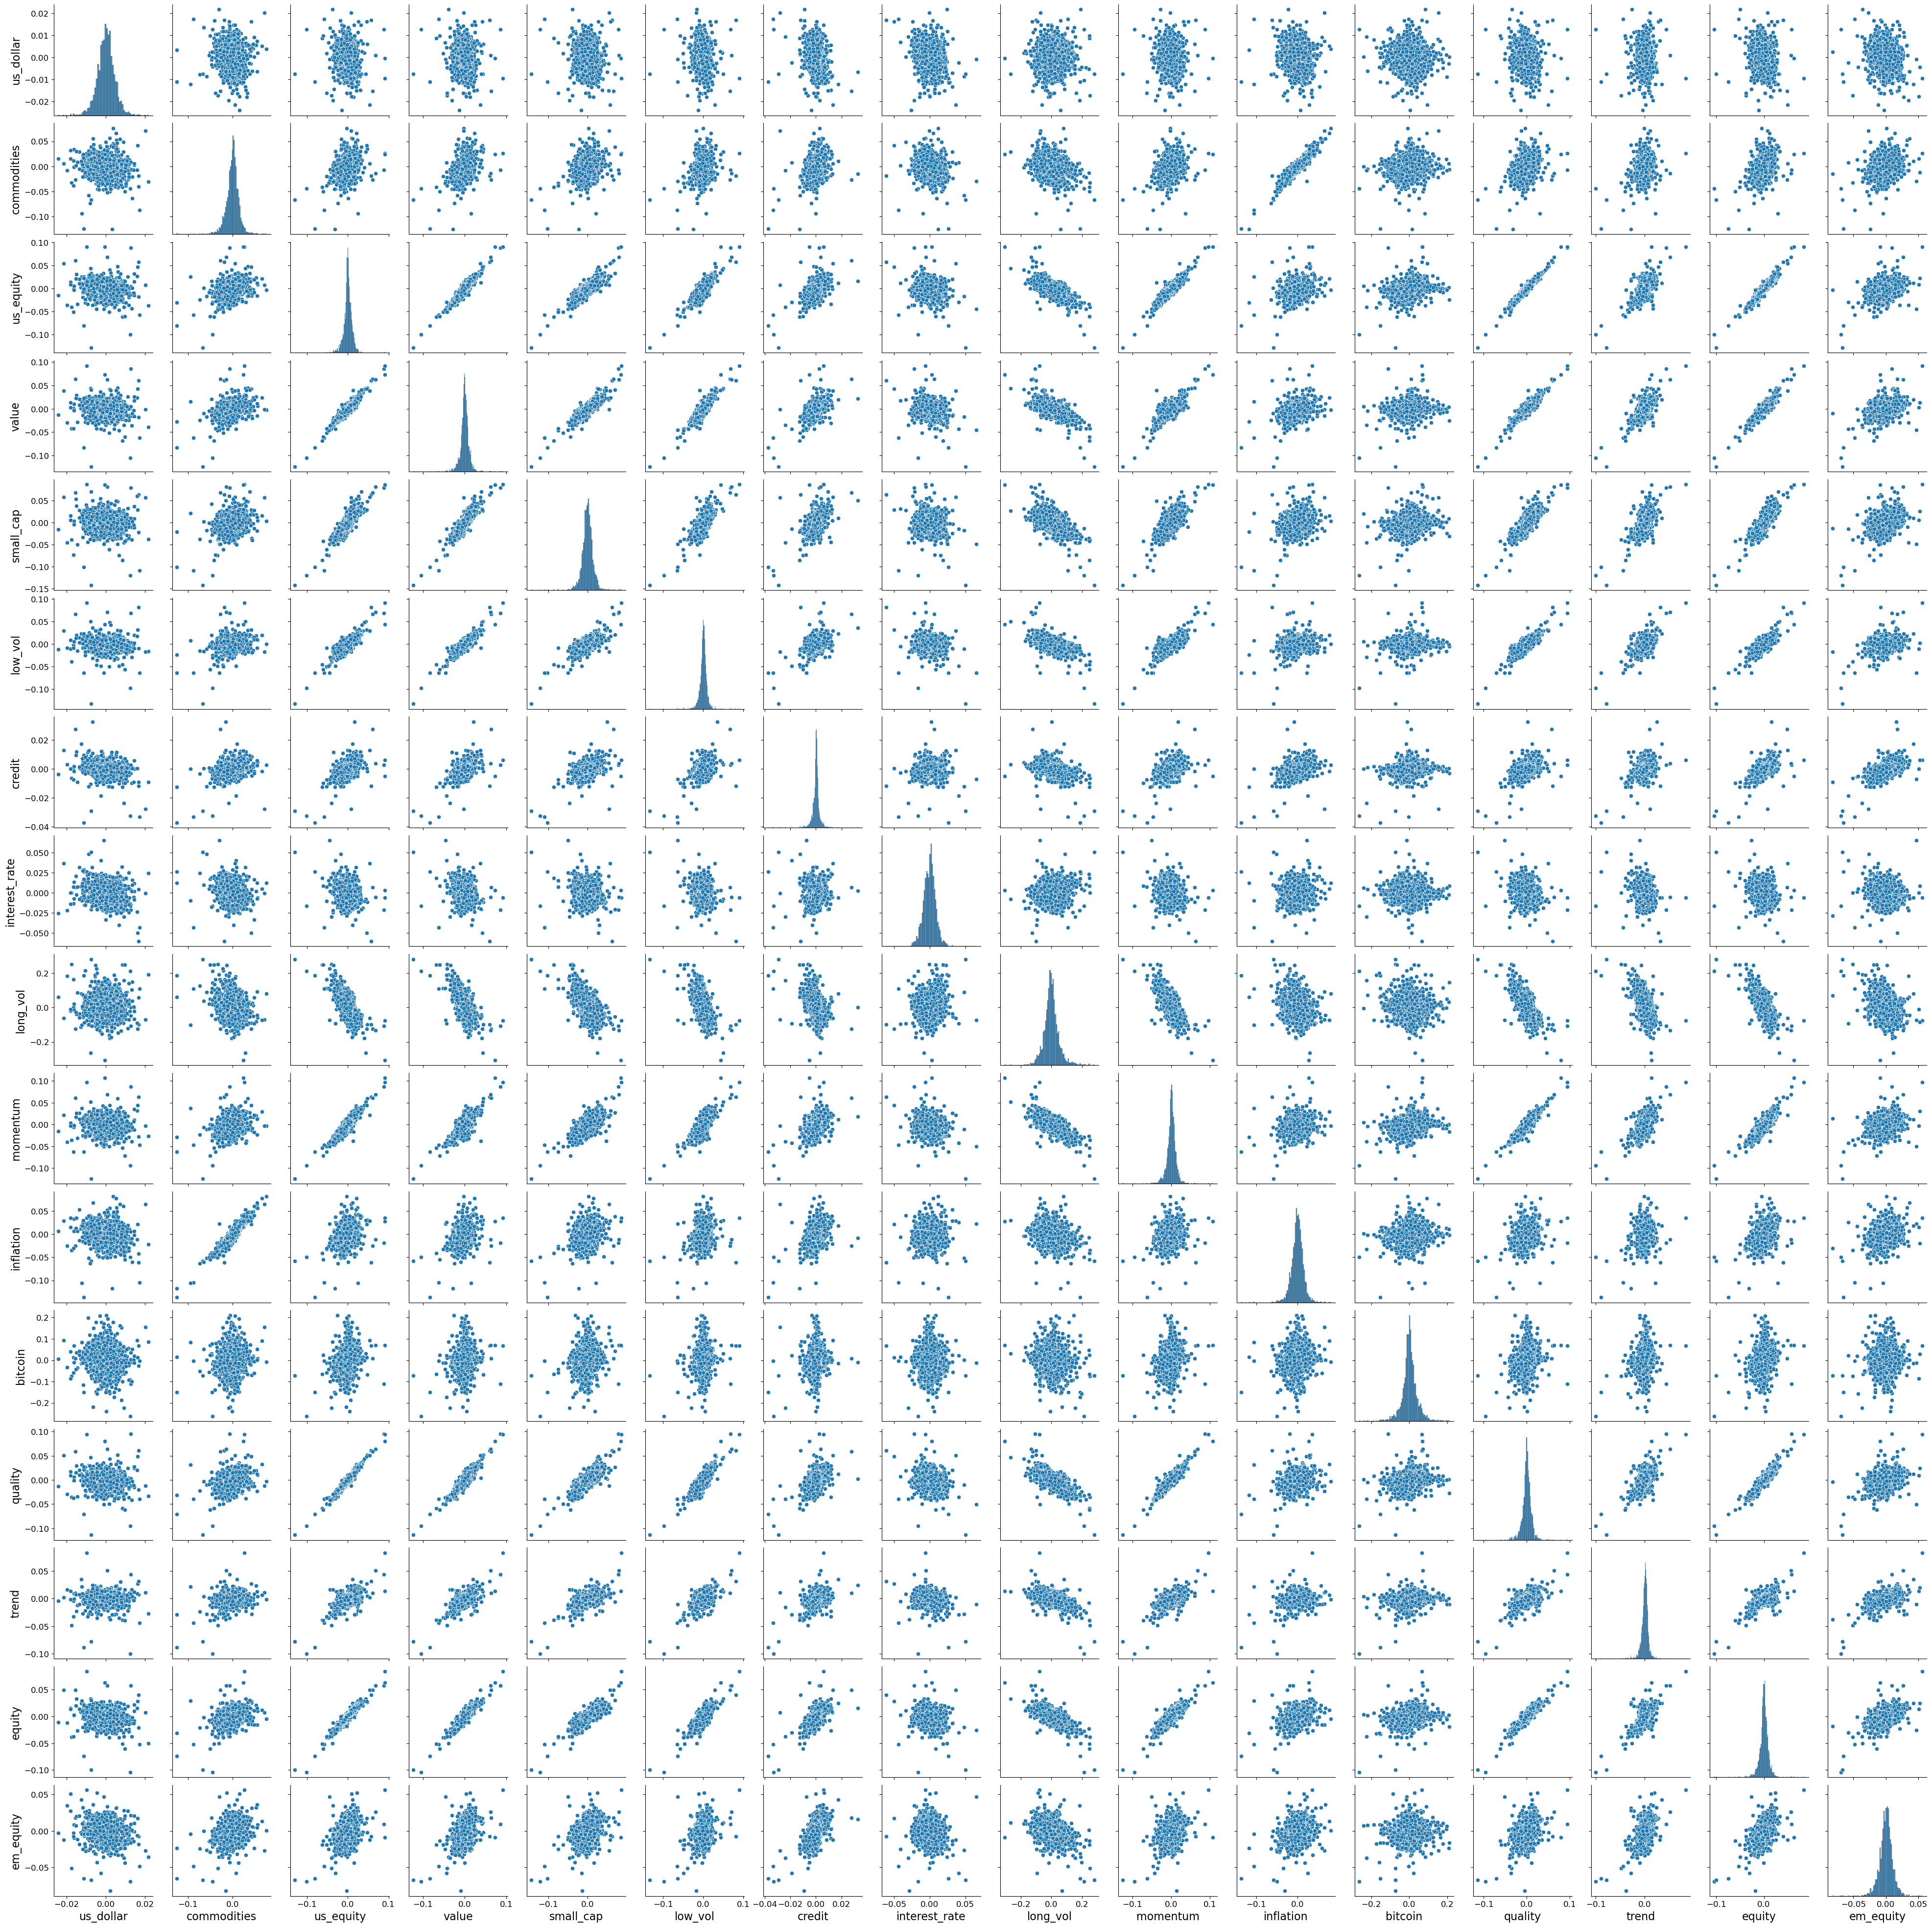

In [9]:
g = sns.pairplot(return_df)

# Loop through axes and set font sizes
for ax in g.axes.flatten():
    ax.tick_params(labelsize=12)  # Change tick label size
    ax.xaxis.label.set_size(16)   # Change x-axis label size
    ax.yaxis.label.set_size(16)   # Change y-axis label size

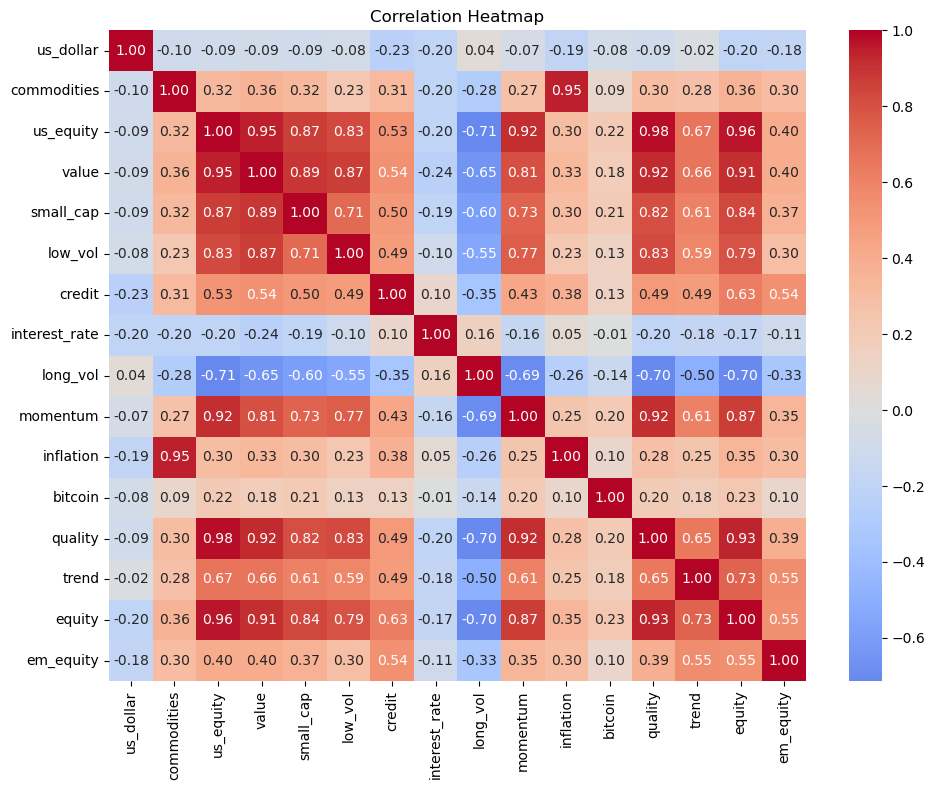

In [6]:
# Compute the correlation matrix
corr_matrix = return_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

The correlation matrix gives a much clearer picture on highly correlated features, which can point to redundant features we can consider dropping or transforming for our model.

Some of the most highly correlated pairs include: (> 0.90, or < -0.90)
* quality & us_equity (0.98)
* equity & us_equity (0.96)
* value & us_equity (0.95)
* inflation & commodities (0.95)
* equity & quality (0.93)
* momentum & us_equity (0.92)
* quality & value (0.92)
* quality & momentum (0.92)
* equity & value (0.91)


Macro Styles Features:


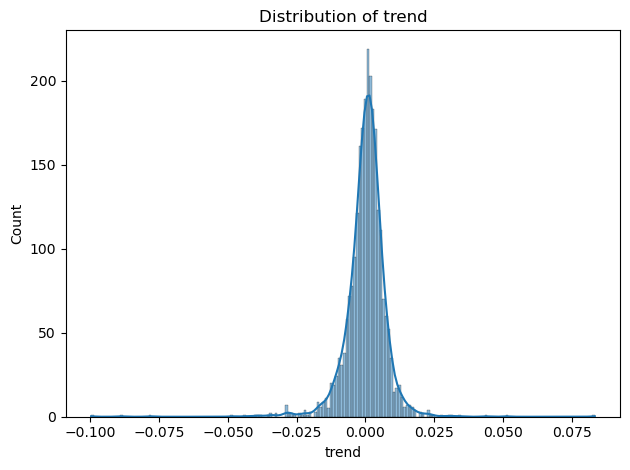

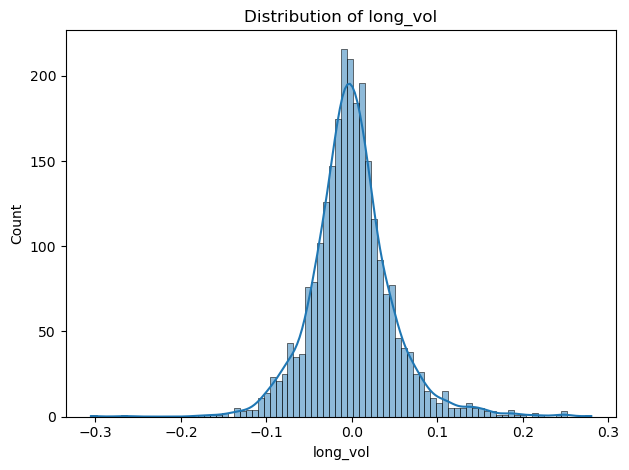

--------------------------------------------------------------------------------
Equity Styles Features:


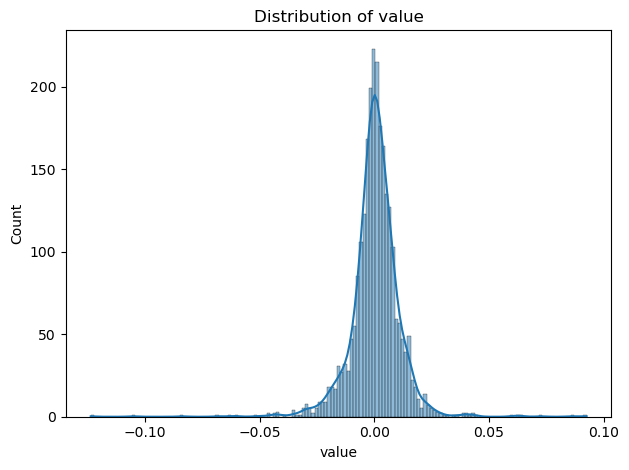

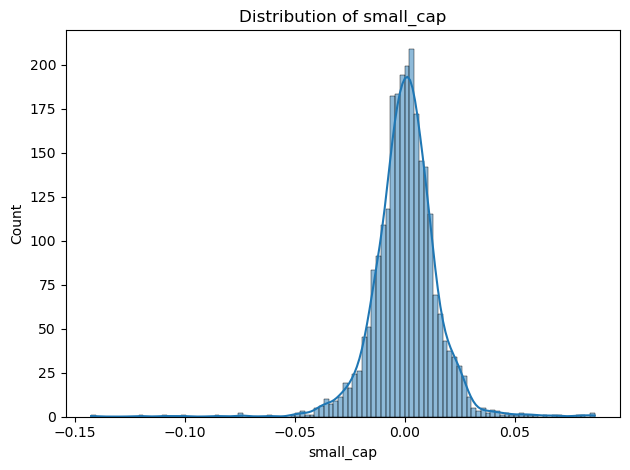

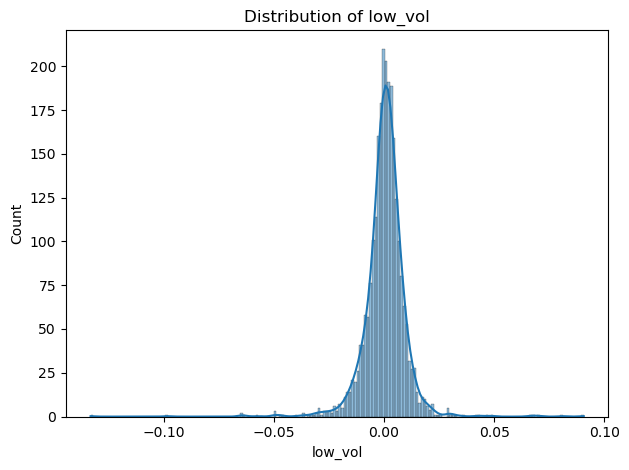

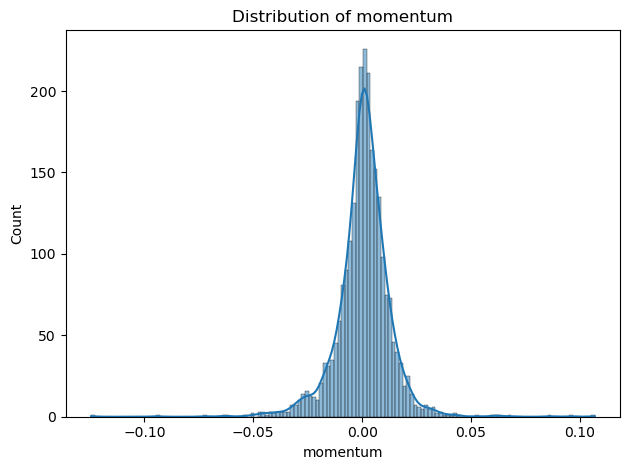

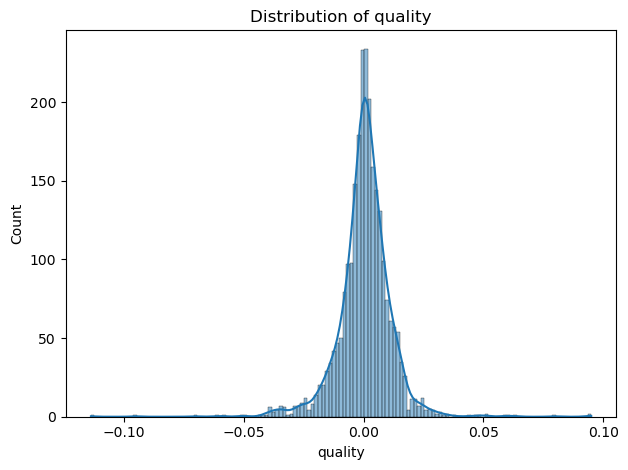

In [ ]:
## Histogram of features

print("Macro Styles Features:")

# Macro_style Features
# get list of features in category
macro_styles_feats = []
for item in category_map.get("macro_styles"):
        macro_styles_feats.append(item)

# plot features in category
for feat in macro_styles_feats:
    if feat in return_df.columns:
        sns.histplot(return_df[feat], kde=True)
        plt.title(f"Distribution of {feat}")
        plt.tight_layout()
        plt.show()

print('-' * 80)
print("Equity Styles Features:")

# Equity_style Features
# get list of features in category
equity_styles_feats = []
for item in category_map.get("equity_styles"):
        equity_styles_feats.append(item)

# plot features in category
for feat in equity_styles_feats:
    if feat in return_df.columns:
        sns.histplot(return_df[feat], kde=True)
        plt.title(f"Distribution of {feat}")
        plt.tight_layout()
        plt.show()

I've plotted the histograms for features in the macro and equity style categories so that we better asses their distributions (compared to the pairplot).

All features have already been log transformed in the data processing step, and it looks like we have roughly normal shapes for all features.
Specifically for the features plotted here, we have some moderate positive skew in long_vol, which makes sense for a feature related to volatility. This should not be an issue for our GMM model, since it should be flexible enough to model deviations via multiple components.

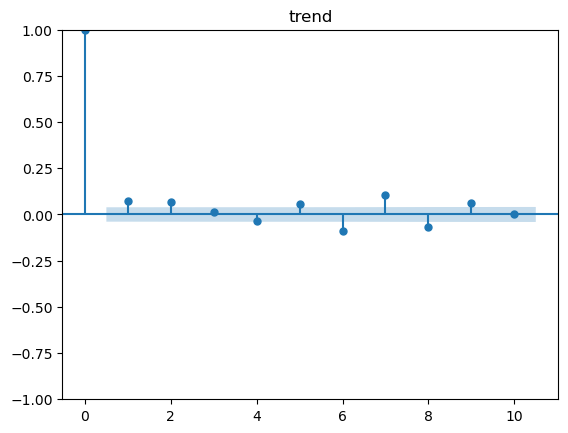

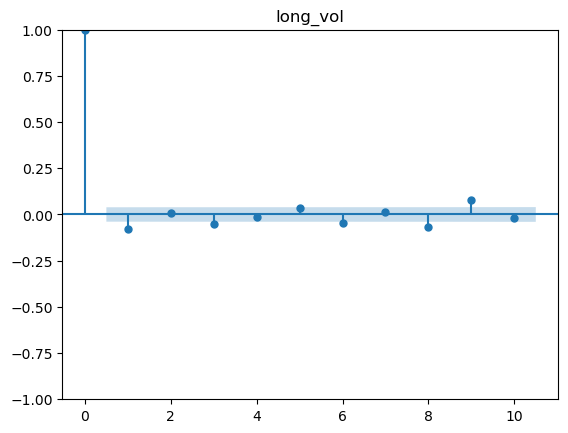

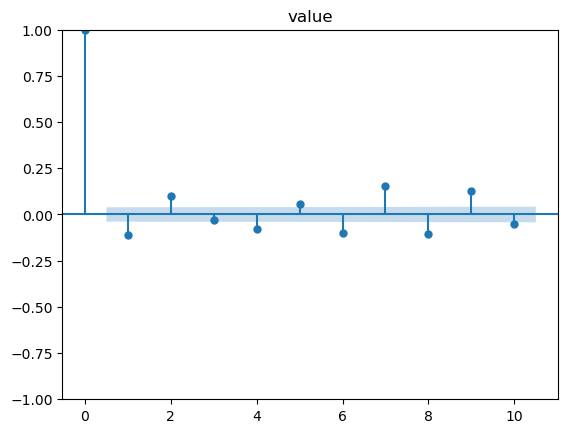

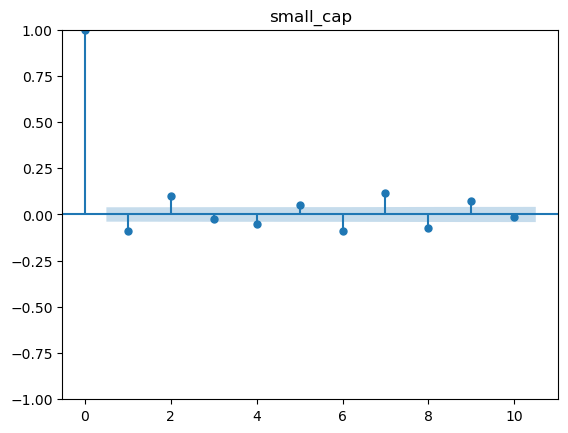

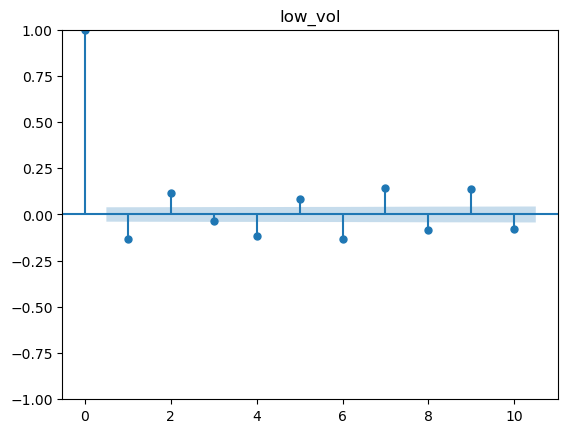

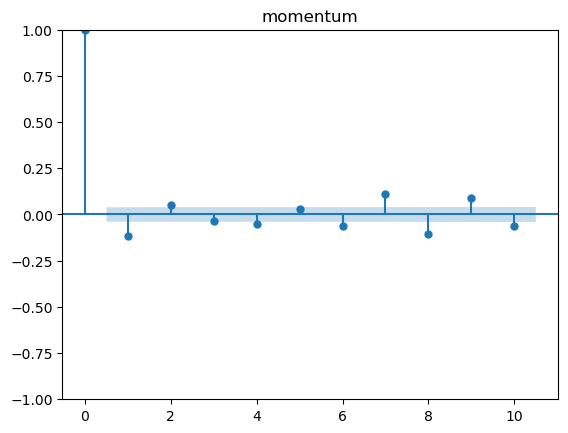

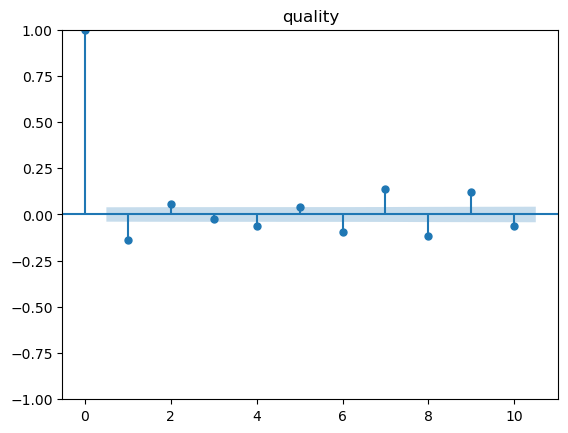

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
# for col in return_df.columns:
#     plot_acf(return_df[col], lags=10)
#     plt.title(f"{col}")
#     plt.show()

for feat in macro_styles_feats:
    if feat in return_df.columns:
        plot_acf(return_df[feat], lags=10)
        plt.title(f"{feat}")
        plt.show()

for feat in equity_styles_feats:
    if feat in return_df.columns:
        plot_acf(return_df[feat], lags=10)
        plt.title(f"{feat}")
        plt.show()

The autocorrelation graphs can help detect serial dependence in our features The value feature shows small but statistically significant autocorrelations at multiple lags for some features. While the magnitudes are modest, this may indicate some residual time-dependency. Given our GMM model assumes i.i.d. observations, we may consider differencing or further transformation if this pattern persists across features.

